Color Assignment Notebook

In [10]:
# Importing the required libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
# reading the cropped image
image_path = "../Output_data/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

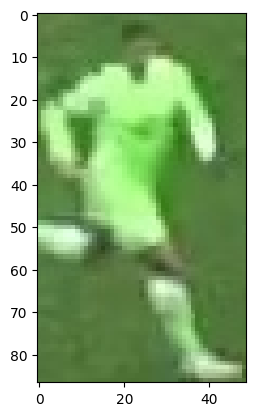

In [4]:
plt.imshow(image)
plt.show()

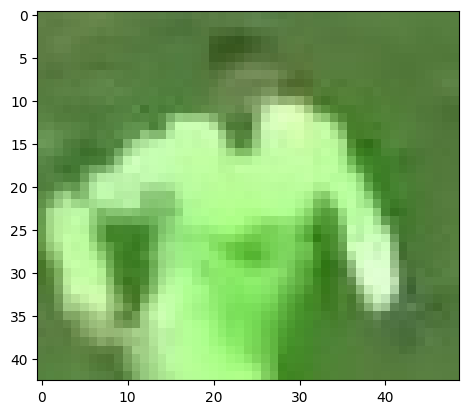

In [5]:
# Taking the top half of the image
top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)
plt.show()

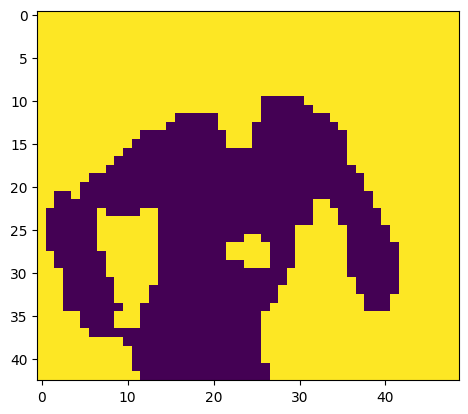

In [12]:
# Clustering the image into 2 clusters

## Reshaping the image into 2D array
image_2D = top_half_image.reshape(-1, 3)

## Performing k-means clustering with the 2 clusters
kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans.fit(image_2D)

# getting the cluster labels
labels = kmeans.labels_

# Reshaping the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Displaying the results
plt.imshow(clustered_image)
plt.show()

In [13]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key = corner_clusters.count)
print(non_player_cluster)

1


In [14]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [16]:
# Predicting the color of the player t-shirt
kmeans.cluster_centers_[player_cluster]
# We can check weather the predicted color is correct or not!

array([170.06300268, 235.47453083, 141.84852547])